In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/sofiiir/eds220-hwk2.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Average Catch by Region from 1878 to 1997'}, xlabel='Region', ylabel='Average Catch'>

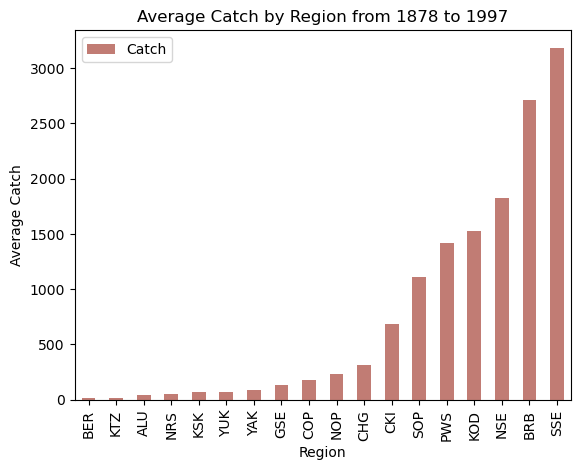

In [2]:
# FINAL CODE

# Load libraries
import pandas as pd
import numpy as np

# Read in salmon data 
catch_data = pd.read_csv('data/salmon_data.csv')

# Index to row 400 and replace catch value to 1
catch_data.loc[400, 'Catch'] = 1

# Change the data type to Integer
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Calculate mean 'Catch' by each region 
avg_region = catch_data.groupby('Region').mean('Catch').sort_values(by = 'Catch')

# Bar graph of the estimated average salmon catches by region 
avg_region.plot(kind = 'bar',
               y = 'Catch',
               title = 'Average Catch by Region from 1878 to 1997',
               ylabel = 'Average Catch',
               color = '#C17C74')

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

In [3]:
# Load libraries
import pandas as pd
import numpy as np

<!-- BEGIN QUESTION -->



In [4]:
# Read in salmon data 
catch_data = pd.read_csv('data/salmon_data.csv')

# View top 5 rows
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [5]:
# Look at column names, non-null values per column, and data types per column
catch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

`.info()` is an especially useful exploration of a dataframe. The output provides the column names, how many non-null values there are for each column, and the data type of each column. This conglomerate data exploration gives the outputs of `.columns`, `.isna().sum()`, and `.dtypes` in a succint table. 

Note: Above markdown is not usable.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [6]:
# Assign a variable to unique comments found in the 'notesRegCode' column
notes_unique = catch_data['notesRegCode'].unique()

# View the unique comments from the 'notesRegCode'
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [7]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [8]:
# Subset to desired columns
catch_data = catch_data[['Region', 'Year', 'Species', 'Catch']]

#View new dataframe head
catch_data.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


In [9]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


The `'Catch'` column is listed as an object when looking at the data types of each column. Upon further exploration, the output is an integer between 0 and 393. This column should have the data type integer. 
The `Year` column should also be a DateTime column to make sure that the date is accurately assessed when processing the data.

In [10]:
# Check data types of each column
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

In [11]:
# View unique inputs for 'Catch'
catch_data['Catch'].unique()

array(['0', '3', '4', ..., '709', '667', '393'], dtype=object)

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [12]:
# Note: This code chunk is commented out to avoid error from running when running all cells
# catch_data['Catch'].astype('int64')

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [13]:
# Subset catch data to one row where 'Catch' is equal to 'I'
catch_I = catch_data[catch_data['Catch'] == 'I']

# View the output to verify it's an entire row
catch_I

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [14]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [15]:
# Based on the above subset index to row 400 and replace catch value to 1
catch_data.loc[400, 'Catch'] = 1
catch_1 = catch_data.loc[400]

# Print catch_1
catch_1

# Print data from row 400 ensure value is accurate
catch_data.loc[400]

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

In [16]:
# Verify no value in column 'Catch' is equal to I
catch_data[catch_data['Catch'] == 'I']

,Region,Year,Species,Catch


<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [17]:
# Change the data type to Integer
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Save the data type of 'Catch'
catch_column_type = catch_data['Catch'].dtype

# Print variable to confirm data type is Integer
catch_column_type

dtype('int64')

In [18]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [19]:
# Calculate mean 'Catch' by each region 
avg_region = catch_data.groupby('Region').mean('Catch').sort_values(by = 'Catch')

# View new dataframe
avg_region

,Year,Catch
Region,,
BER,1946.5,16.372549
KTZ,1955.0,18.836145
ALU,1954.0,40.383908
NRS,1979.0,51.502703
KSK,1955.0,67.642353
YUK,1957.0,68.645570
YAK,1949.5,91.922917
GSE,1918.5,133.841463
COP,1950.5,179.223404


In [20]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Average Catch by Region from 1878 to 1997'}, xlabel='Region', ylabel='Average Catch'>

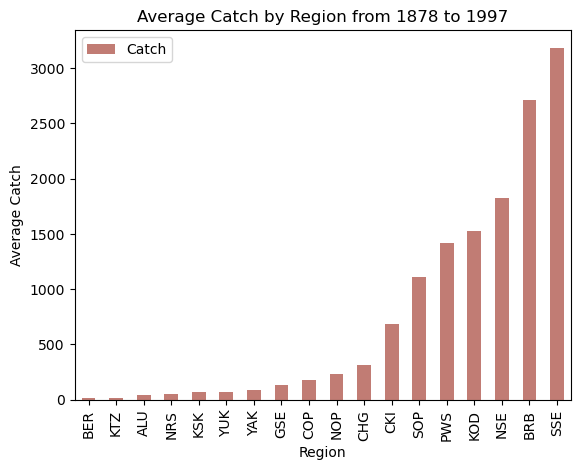

In [21]:
# Bar graph of the estimated average salmon catches by region 
avg_region.plot(kind = 'bar',
               y = 'Catch',
               title = 'Average Catch by Region from 1878 to 1997',
               ylabel = 'Average Catch',
               color = '#C17C74')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The distribution of locations that get more fish are distributed in what feels like randomly based on this histogram. Southern Southeast Alaska, Bristol Bay Management Area, Northern Southeast Alaska, and Kodiak Management Area come three of the four regions that Alaska fisheries is broken up into. The forward from the data report from the Alaska Department of Fish and Game explains that there have been changes to reporting, management of fisheries, productivity of the stocks, and difference in fishing efficiancy that all contribute to the differences in fish catch throughout time and locations. 

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [22]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!